# Case Study: Stock Option on SAP

## Set-up

We want to learn about options using an example. 

We single out SAP.DE. 

We look at SAP stock returns, refresh prior observations on SAP's stock return.

Then we monitor ATM and approx 7\% OTM put options on the SAP stock with a maturity of 1 month (approx 22 trading days)



## Interesting Observations and Challenges
$$
\\
$$

**Exercise Type**

Eurex offers trading in European and American stock options on SAP

European option allows to exercise option only at maturity

American option allows the exercise during lifetime of the option

$$
\\
$$

**Implied Volatility**

Black-Scholes option pricing model is for European options only

There is no closed-form solution yet for American options

Inversion and pricing of American stock options is done via Cox-Ross-Rubinstein type binomial tress

Inversion and pricing of European stock options is done via Black-Scholes model

$$
\\
$$

**Treatment of Dividends**

Options on indices are usually of European type and on the price index. A price index $dS/S$ does NOT pay dividends. 

A call option on a dividend paying stock gives you the right to get demand one unit of stock at maturity of the option contract. If the stock pays a dividend during the lifetime of the option, that dividend does NOT go to the holder of the option. Said differently, the higher payed out dividends while you hold the stock option, the lower the present value of the stock that you receive when exercising the option. That is consistent with pricing a stock using Discounted Cashflow Method.... The stock is only worth all discounted FUTURE dividends. Hence, dividends that the stock pays lower the value of the call option. As a result, Black-Scholes and Binomial Tree valuation need to be adjusted for payed out dividends that the holder of the option is NOT entitled to.

The adjustment in Black-Scholes is simple. In a previous class, I showed you how to price and invert out option volatilities from the Black-Scholes model. It would be accurate to think that this example was for a European option on a NON-dividend paying stock. For a dividend paying stock, the European option price can be determined using the same formula, yet 

$$
\text{swaping} \; S_0 \; \text{with} \; S_0 \times e^{-q \times T} 
$$

where $q \geq 0$ is the expected dividend yield for the lifetime of the option and $T$ is the maturity of the option. The larger $q$ the more dividends are expected to be payed out during the lifetime of the option and the lower the value of stock that the call option holder receives at maturity.

$$
\\
$$

For European Options, the (proper) Black-Scholes Option pricing model for options on stocks that could pay out dividends throughout the life of the option is

\begin{equation*}
C(S_0,K, r, q, T, \sigma)= S_0\times e^{-q \times T} \times \Phi(d_1) - K \times \Phi(d_2) \times e^{-r \times T} \\  
P(S_0,K, r, q, T, \sigma)=K \times e^{-r\times T} \times \Phi(-d_2) - S_0 \times e^{-q \times T} \times \Phi(-d_1)
\end{equation*}

with
\begin{align*}
d_1 &= \frac{ \ln (S_0 \times e^{-q \times T} / K ) + (r + \sigma^2/2)\times T}{\sigma \sqrt{T}} \\
d_2 &= d_1 - \sigma \sqrt{T}
\end{align*}

$$
\\
$$


**Future-Spot-Parity**

We obtain from EUREX American and European options of SAP. For this class, we work with European options. This allows us to relate to our previous option class where we worked with the Black-Scholes option pricing formula.

Yet, EUREX does not deliver us the price of the stock price. Option pricing and the inversion of option-implied volatilities requires us to match pairs of 

$$
S_t \qquad \text{and} \qquad C_t \qquad \text{and/or} \qquad P_t.
$$

$S_t$ is traded at the spot market. For SAP.DE this would be XETRA in Frankfurt. Prices on XETRA are the actual prices that you have to pay on a particular point in time. Meaning, if a stock split happens or if a dividend is payed out, the stock price $S_t$ drops accordingly. What happens to the option contract if a stock split happens? Well, as we looked at Xetra SAP.DE prices we have realized that there is not perfect alignment with the options. The problem was severe. Working with Yahoo-Finance stock price data did also not help because Yahoo-Finance provides so-called 'research data'. If a 2-in-1 stock split happens, Yahoo-Finance halfs all past prices by factor 2. 

Stock options that we receive from the Chicago Board of Exchange (CBOE) come along with the matched stock price.

What shall we do with the EUREX options?

On EUREX, one can also trade a futures on SAP.DE. In general, every firm with an option on EUREX does also allow you trade a futures. These futures have the same maturity than the option contract. That is really neat as one considers the no-arbitrage relation between spot market (stock price) and futures market (futures price):

\begin{align*}
F_{0,T} \times e^{-r \times T} = S_0 \times e^{-q \times T}.
\end{align*}

If you are long $F_{0,T}$ it means you obtain $S_T$ in time $T>0$ and you pay for it $F_{0,T}$. At time 0, you do not pay anything (except margin). Only at time $T$, you receive for a cash settled futures $S_T - F_{0,T}$. Copying my arguments from above, if you are long the futures you are NOT entitled to any dividends that the stock pays during the lifetime of the futures contract. This explains the term $S_0 \times e^{-q \times T}$ on the right hand side of the last equation.  

As $F_{0,T}$ and $C_0(S_0, T, .)$ and $P_0(S_0, T,.)$ are quoted at the same time, with the same maturity, and as markets are competitive and efficient (arbitrage-free), we can 

$$
\text{swap} \; S_0\times e^{-q T} \; \text{with} \; F_{0,T} \times e^{-r \times T} \qquad \text{in the option pricing model}.
$$


$$
\\
$$

**Option-Pricing Model for European Stock Option on SAP.DE**

The above consideration (i.e. 'observing high quality futures prices') make us work with


\begin{equation*}
C(F_{0,T}, K, r, T, \sigma)= F_{0,T} \times e^{-r \times T} \times \Phi(d_1) - K \times \Phi(d_2) \times e^{-r \times T} \\  
P(F_{0,T},K, r, T, \sigma)=K \times e^{-r\times T} \times \Phi(-d_2) - F_{0,T} \times e^{-r \times T} \times \Phi(-d_1)
\end{equation*}

with
\begin{align*}
d_1 &= \frac{ \ln (F_{0,T}  / K ) + (\sigma^2/2)\times T}{\sigma \sqrt{T}} \\
d_2 &= d_1 - \sigma \sqrt{T}
\end{align*}

$$
\\
$$

**Which risk-free rate to use?**

Since recently, LIBOR rates were the benchmark. Manipulation scandals, with an involvement of Deutsche Bank, made markets move away from LIBOR. 

The choice of the risk-free rate is somewhat arbitrary. Government bond yields might be too low, OIS rates as well, while LIBOR rates are too high or affected by manipulation. We use OIS rates, according to Hul et al. () the new benchmark of risk-free rates. 

Yet, note that a recent paper of Binsbergen et al. (2021) and Ulrich, Florig and Wuchte (2021) extract the risk-free rate from put and call prices(!). 




## Noteworthy Findings

The annualized daily return of holding a ATM (7\% OTM) put options is on average -8\% (-19\%) with a vol of 400\% (550\%)

 
OTM put options are priced with a higher vol than ATM put options.

7\%-OTM put has an on average 4.3\% higher priced-in vol than an ATM put. The stdev of that spread is 1.5\%.

The ATM Q-vol has been on average 1.7\% higher than the P-vol, with a stdev of 3.7\%.

The OTM Q-vol has been on average 6.0\% higher than the P-vol, with a stdev of 4.13\%.


# Some Option Analysis

# Spot Market

In [ ]:
!pip install yfinance

In [1]:
import yfinance as yf #yahoo finance package from python
import numpy as np
import pandas as pd

In [2]:
sap = yf.Ticker('SAP')#sap object

In [7]:
sap_eod_data = sap.history(period='25y') #give me daily sap data for last 20 years

In [8]:
sap_eod_data.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-22,8.974755,8.974755,8.974755,8.974755,3600,0.0,0.0
1996-01-23,8.844687,8.844687,8.844687,8.844687,50400,0.0,0.0
1996-01-24,9.104824,9.104824,9.104824,9.104824,6000,0.0,0.0


In [9]:
sap_eod_data = sap_eod_data[['Close']]# close is adjusted for stock splits but not for dividends.

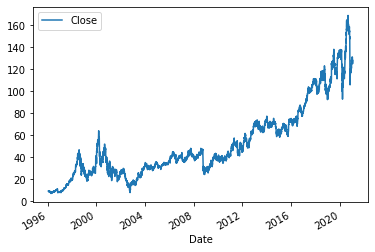

In [10]:
sap_eod_data.plot() #'Close' does not share data error from 'Adj.Close' of day 1.  

## Spot Return

In [11]:
sap_eod_data['ln_return'] = np.log(1+sap_eod_data['Close'].pct_change())

plot returns

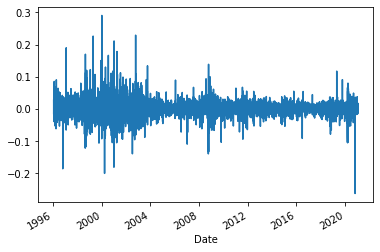

In [12]:
sap_eod_data['ln_return'].plot();

plot zscores

In [13]:
from scipy.stats import zscore

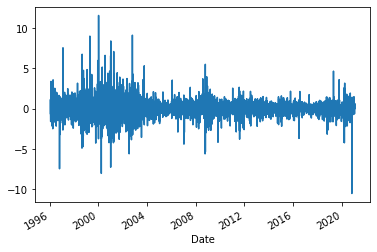

In [15]:
pd.Series(zscore(sap_eod_data['ln_return'].dropna()),index=sap_eod_data.index[1:]).plot(); #clearly non-Gaussian: positive and negative jumps in returns

## Time-Series Predictability in Spot Returns?, i.e. ARMA(p,q)

In [16]:
from statsmodels.tsa.arima_model import ARMA

Select ARMA order

In [17]:
r_t = sap_eod_data['ln_return'].dropna()

Use BIC to select order p,q of ARMA model

In [18]:
def selectARMAorder(max_p,max_q,returns):
    bic_vals = np.zeros((max_p+1,max_q+1))
    for i in range(max_p+1):
        for j in range(max_p+1):
            arma_model = ARMA(returns,(i,j))
            bic_vals[i,j] = arma_model.fit().bic
    opt = np.argmin(bic_vals)
    opt_model = np.unravel_index(opt, bic_vals.shape)
    return opt_model

In [19]:
opt_arma_order = selectARMAorder(2,2,r_t.values)

In [20]:
opt_arma_order #no evidence for predictability

(0, 0)

constant mean fits best according to bic

In [21]:
arma_model = ARMA(r_t,opt_arma_order)

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [22]:
arma_result = arma_model.fit()

In [23]:
252 * arma_result.params #annualized mean return, i.e. 10.6%

const    0.106412
dtype: float64

In [24]:
np.sqrt(arma_result.sigma2* 252) #annualized vol, 39%

0.397220461901569

## Spot Vol 

First import the required model

In [25]:
%run helper/Helper_SVM_Harvey.ipynb

Fit SVM to SAP demeaned returns

In [26]:
SVM = QLSV(r_t.values - r_t.values.mean())
SVM_result = SVM.fit(cov_type='robust')

In [27]:
print(SVM_result.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 6294
Model:                           QLSV   Log Likelihood              -14386.638
Date:                Fri, 22 Jan 2021   AIC                          28779.275
Time:                        17:58:53   BIC                          28799.518
Sample:                             0   HQIC                         28786.288
                               - 6294                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi            0.9928      0.002    501.755      0.000       0.989       0.997
sigma2_eta     0.0149      0.003      4.785      0.000       0.009       0.021
mu            -8.2025      0.222    -36.897      0.0

In [28]:
SVM_condVol_sap = np.exp(SVM_result.smoothed_state[0] / 2)

Plot the time series, annualized in decimals

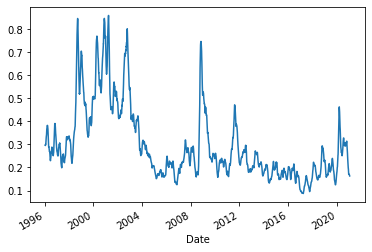

In [30]:
pd.Series(np.sqrt(252)*SVM_condVol_sap, index=sap_eod_data.index[1:]).plot();

## Histogram Spot Returns

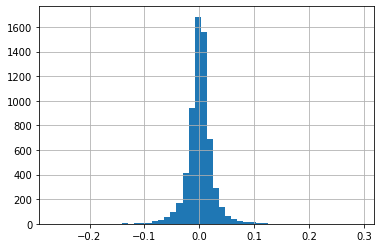

In [33]:
r_t.hist(bins=50);

# Option Market

Load European SAP ATM and OTM Options from CSV File

In [38]:
sap_atm_options = pd.read_csv("sap_options/sap_atm_options_europ.csv")
sap_otm_options = pd.read_csv("sap_options/sap_otm_options_europ.csv") #, on avg 7% OTM

In [41]:
#rename 1 column for clarification purpose:
sap_atm_options = sap_atm_options.rename(columns={"underlying_price": "futures_price"})
sap_otm_options = sap_otm_options.rename(columns={"underlying_price": "futures_price"})

In [42]:
sap_atm_options.head(3)

,product_name,date,call_put_flag,exercise_price,put_price,exp_date,dtm,rf,futures_price,moneyness,log_return
0,SAP [european],2012-05-23,P,47.0,1.38,2012-06-15,23,0.003322,46.63,1.007935,0.235906
1,SAP [european],2012-05-24,P,46.0,1.11,2012-06-15,22,0.003255,46.17,0.996318,0.155653
2,SAP [european],2012-05-25,P,46.0,1.28,2012-06-15,21,0.003267,45.79,1.004586,0.142500


**Note:**

2012-05-23: first date at which a European put on SAP.DE was traded

we selected per day one put option with a maturity closest to one month, i.e. 22 trading days

Eurex adjusts exercise price for stock splits only. no adjustments for dividends (of course)

rf: interpolated euro-OIS rates, shortest maturity is 1 day and then something like 5, 14 etc days. maturity grid is the same each day. units: 0.003322 is the annualized risk-free rate for 23 days.

futures_price: coincides with the price of the futures on SAP with a maturity that matches the options maturity. Note: there is only ONE futures contract on SAP with a maturity that coincides with the options maturity. Note, the futures contract has NO strike. Note, the fair (market) price of a futures coincides with the risk-neutral (risk-free) discounted expected value of the stock price of SAP at maturity of the futures contract.

Note: the only way out that we came across was to rely on the no-arbitrage Spot-Futures parity. This one allows us to re-express the ex-dividend stock price in any option model as the 'discounted' futures price.  

moneyness: K/F

log return: is the daily log return when buying the displayed option and holding it for one day.

## Option Return: ATM

Plot returns

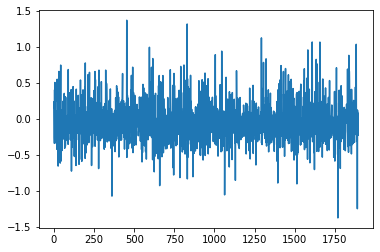

In [43]:
sap_atm_options["log_return"].plot(); #1.5 means 150% on a single day

Plot zscore

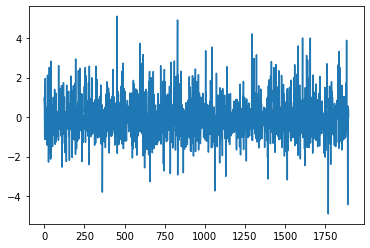

In [44]:
pd.Series(zscore(sap_atm_options["log_return"])).plot(); #note: less non-gaussian outliers than in sap returns

### Check for time-series predictability, i.e. ARMA(p,q)

First select optimal order

In [45]:
opt_arma_order = selectARMAorder(2,2,sap_atm_options["log_return"].values)

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [46]:
opt_arma_order

(0, 0)

Fit Model: constant mean only

In [50]:
arma_model = ARMA(sap_atm_options["log_return"].values,opt_arma_order)

In [51]:
arma_result = arma_model.fit()
252*arma_result.params # avg return (annualized): -7%. Note, research has shown average return on holding a put option is negative. Hence, writing put options is profitable on average 

/Users/maximulrich/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


array([-6.9708317])

In [52]:
np.sqrt(arma_result.sigma2*252) #annualized return vol of ATM put option, 435%, i.e. effect of leverage is visible

4.355397050084122

### Stochastic Vol of ATM-Option Return

In [53]:
SVM = QLSV(sap_atm_options["log_return"].values - sap_atm_options["log_return"].values.mean())
SVM_result = SVM.fit(cov_type='robust')

In [54]:
print(SVM_result.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1895
Model:                           QLSV   Log Likelihood               -4277.142
Date:                Fri, 22 Jan 2021   AIC                           8560.284
Time:                        18:14:21   BIC                           8576.925
Sample:                             0   HQIC                          8566.411
                               - 1895                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi            0.9844      0.031     31.384      0.000       0.923       1.046
sigma2_eta     0.0008      0.002      0.332      0.740      -0.004       0.005
mu            -2.8620      0.068    -42.362      0.0

In [55]:
#conditonal vol of SVM implied return model
SVM_condVol_sap = np.exp(SVM_result.smoothed_state[0] / 2)

__Plot the time series for conditional volatility__

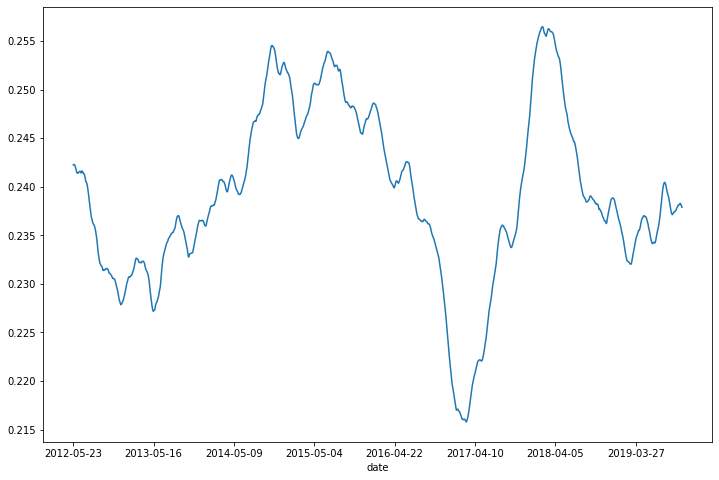

In [57]:
pd.Series(SVM_condVol_sap, index=sap_otm_options["date"]).plot(figsize=(12,8)); # surprising: constant at 400% (annualized)

### Histogram of ATM Return

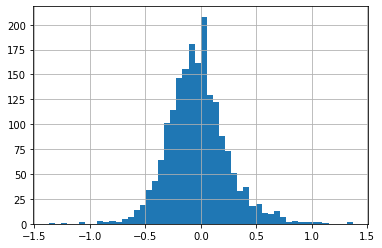

In [58]:
sap_atm_options["log_return"].hist(bins=50);

## Option Return: 7%-OTM 

Plot the return and z-score of SAP OTM options' daily returns

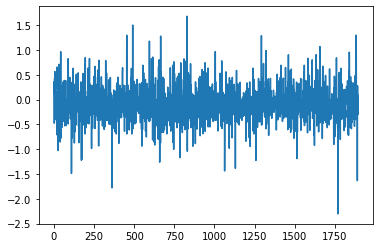

In [59]:
sap_otm_options["log_return"].plot();

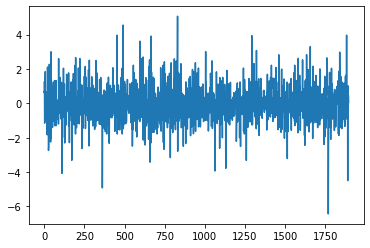

In [60]:
pd.Series(zscore(sap_otm_options["log_return"])).plot();

### Time-series Predictability, i.e. ARMA(p,q)

In [61]:
opt_arma_order = selectARMAorder(2,2,sap_otm_options["log_return"].values)

In [63]:
opt_arma_order

(0, 0)

In [64]:
arma_model = ARMA(sap_otm_options["log_return"].values,opt_arma_order)

In [65]:
arma_result = arma_model.fit()

In [66]:
arma_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1895
Model:                     ARMA(0, 0)   Log Likelihood                -681.228
Method:                           css   S.D. of innovations              0.347
Date:                Fri, 22 Jan 2021   AIC                           1366.456
Time:                        18:17:55   BIC                           1377.550
Sample:                             0   HQIC                          1370.541
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0749      0.008     -9.404      0.000      -0.090      -0.059
==============================================================================
"""

In [67]:
252*arma_result.params #-19% annualized return. hence writing OTM put options is profitable

array([-18.87072358])

In [68]:
np.sqrt(arma_result.sigma2*252) #550% annualized vol

5.502833323627376

In [69]:
sap_otm_options

,product_name,date,call_put_flag,exercise_price,put_price,exp_date,dtm,rf,futures_price,moneyness,log_return
0,SAP [european],2012-05-23,P,43.0,0.27,2012-06-15,23,0.003322,46.6300,0.922153,0.351398
1,SAP [european],2012-05-24,P,43.0,0.31,2012-06-15,22,0.003255,46.1700,0.931341,0.138150
2,SAP [european],2012-05-25,P,43.0,0.37,2012-06-15,21,0.003267,45.7900,0.939070,0.176931
3,SAP [european],2012-05-28,P,43.0,0.23,2012-06-15,18,0.003346,46.1700,0.931341,-0.475424
4,SAP [european],2012-05-29,P,43.0,0.15,2012-06-15,17,0.003272,46.7500,0.919786,-0.427444
...,...,...,...,...,...,...,...,...,...,...,...
1890,SAP [european],2019-10-14,P,105.0,0.66,2019-11-15,32,-0.004400,114.7181,0.915287,0.277632
1891,SAP [european],2019-10-15,P,105.0,0.57,2019-11-15,31,-0.004508,115.4389,0.909572,-0.146603
1892,SAP [european],2019-10-16,P,110.0,1.00,2019-11-15,30,-0.004510,116.6006,0.943391,-0.300105
1893,SAP [european],2019-10-17,P,110.0,1.09,2019-11-15,29,-0.004493,115.9621,0.948586,0.086178


### Stochastic Volatility of OTM-Return

In [70]:
SVM = QLSV(sap_otm_options["log_return"].values - sap_otm_options["log_return"].values.mean())
SVM_result = SVM.fit(cov_type='robust')

In [71]:
print(SVM_result.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 1895
Model:                           QLSV   Log Likelihood               -4319.370
Date:                Fri, 22 Jan 2021   AIC                           8644.740
Time:                        18:19:28   BIC                           8661.381
Sample:                             0   HQIC                          8650.867
                               - 1895                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi            0.7410      0.111      6.673      0.000       0.523       0.959
sigma2_eta     0.2469      0.166      1.492      0.136      -0.077       0.571
mu            -2.4393      0.068    -35.654      0.0

In [72]:
#conditonal vol of SVM implied return model
SVM_condVol_sap = np.exp(SVM_result.smoothed_state[0] / 2)

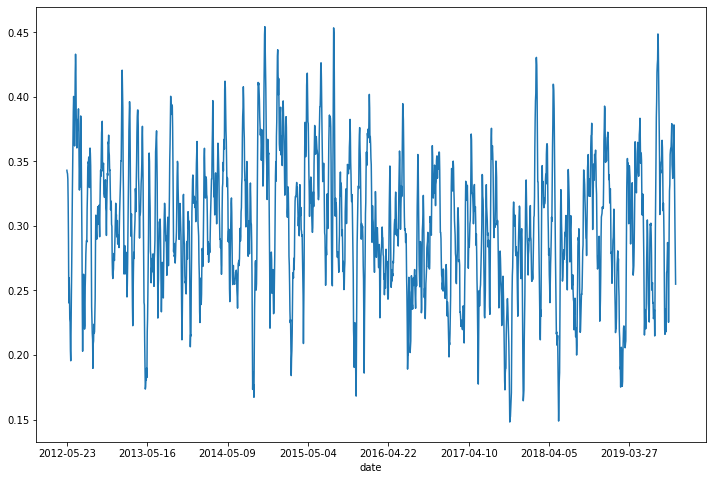

In [73]:
pd.Series(SVM_condVol_sap, index=sap_otm_options["date"]).plot(figsize=(12,8));

### Histogram: OTM-Return 

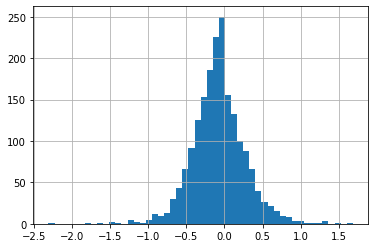

In [75]:
sap_otm_options["log_return"].hist(bins=50);

# Option-Implied Volatility 

In [77]:
from helper.black_scholes import IV_BS_Newton

## Option-Implied ATM Vol

In [78]:
sap_atm_options['bs_impl_vol'] = IV_BS_Newton(sap_atm_options["put_price"].values, sap_atm_options["futures_price"].values,\
                sap_atm_options["exercise_price"].values, sap_atm_options["dtm"].values/360,\
                sap_atm_options["rf"].values,type_='P', underlying='future')

In [79]:
sap_atm_options.head(8)

,product_name,date,call_put_flag,exercise_price,put_price,exp_date,dtm,rf,futures_price,moneyness,log_return,bs_impl_vol
0,SAP [european],2012-05-23,P,47.0,1.38,2012-06-15,23,0.003322,46.630,1.007935,0.235906,0.251302
1,SAP [european],2012-05-24,P,46.0,1.11,2012-06-15,22,0.003255,46.170,0.996318,0.155653,0.262600
2,SAP [european],2012-05-25,P,46.0,1.28,2012-06-15,21,0.003267,45.790,1.004586,0.142500,0.265132
3,SAP [european],2012-05-28,P,46.0,0.99,2012-06-15,18,0.003346,46.170,0.996318,-0.256910,0.261046
4,SAP [european],2012-05-29,P,47.0,1.07,2012-06-15,17,0.003272,46.750,1.005348,-0.337806,0.231310
5,SAP [european],2012-05-30,P,46.0,0.99,2012-06-15,16,0.003304,45.930,1.001524,0.405465,0.246994
6,SAP [european],2012-05-31,P,46.0,1.61,2012-07-20,50,0.003000,46.400,0.991379,-0.111552,0.262684
7,SAP [european],2012-06-01,P,45.0,2.06,2012-07-20,49,0.002815,44.685,1.007049,0.507595,0.287882


note:

$$
F e^{-r} \equiv S e^{-q}
$$

**Double Check: Use BS formula with Ex-Div Stock Price, Inverted from Futures Price**

In [80]:
Seq = sap_atm_options["futures_price"] * np.exp(-sap_atm_options["rf"]*sap_atm_options["dtm"]/360)
 

In [81]:
doublecheck = IV_BS_Newton(sap_atm_options["put_price"].values, Seq,\
                sap_atm_options["exercise_price"].values, sap_atm_options["dtm"].values/360,\
                sap_atm_options["rf"].values,type_='P', underlying='stock')

In [82]:
sap_atm_options['bs_impl_vol_doubleCheck'] = doublecheck 

In [83]:
sap_atm_options.head(8)

,product_name,date,call_put_flag,exercise_price,put_price,exp_date,dtm,rf,futures_price,moneyness,log_return,bs_impl_vol,bs_impl_vol_doubleCheck
0,SAP [european],2012-05-23,P,47.0,1.38,2012-06-15,23,0.003322,46.630,1.007935,0.235906,0.251302,0.251302
1,SAP [european],2012-05-24,P,46.0,1.11,2012-06-15,22,0.003255,46.170,0.996318,0.155653,0.262600,0.262600
2,SAP [european],2012-05-25,P,46.0,1.28,2012-06-15,21,0.003267,45.790,1.004586,0.142500,0.265132,0.265132
3,SAP [european],2012-05-28,P,46.0,0.99,2012-06-15,18,0.003346,46.170,0.996318,-0.256910,0.261046,0.261046
4,SAP [european],2012-05-29,P,47.0,1.07,2012-06-15,17,0.003272,46.750,1.005348,-0.337806,0.231310,0.231310
5,SAP [european],2012-05-30,P,46.0,0.99,2012-06-15,16,0.003304,45.930,1.001524,0.405465,0.246994,0.246994
6,SAP [european],2012-05-31,P,46.0,1.61,2012-07-20,50,0.003000,46.400,0.991379,-0.111552,0.262684,0.262684
7,SAP [european],2012-06-01,P,45.0,2.06,2012-07-20,49,0.002815,44.685,1.007049,0.507595,0.287882,0.287882


## Option-Implied OTM Vol 

In [84]:
sap_otm_options['bs_impl_vol'] = IV_BS_Newton(sap_otm_options["put_price"].values, sap_otm_options["futures_price"],\
                sap_otm_options["exercise_price"].values, sap_otm_options["dtm"].values/360,\
                sap_otm_options["rf"].values,type_='P', underlying='future')

In [85]:
sap_otm_options.head()

,product_name,date,call_put_flag,exercise_price,put_price,exp_date,dtm,rf,futures_price,moneyness,log_return,bs_impl_vol
0,SAP [european],2012-05-23,P,43.0,0.27,2012-06-15,23,0.003322,46.63,0.922153,0.351398,0.308660
1,SAP [european],2012-05-24,P,43.0,0.31,2012-06-15,22,0.003255,46.17,0.931341,0.138150,0.304575
2,SAP [european],2012-05-25,P,43.0,0.37,2012-06-15,21,0.003267,45.79,0.939070,0.176931,0.309338
3,SAP [european],2012-05-28,P,43.0,0.23,2012-06-15,18,0.003346,46.17,0.931341,-0.475424,0.303693
4,SAP [european],2012-05-29,P,43.0,0.15,2012-06-15,17,0.003272,46.75,0.919786,-0.427444,0.306898



___

# Option vs Spot  Market

#### Align SAP Options and SAP returns

In [86]:
sap_atm_options["date"] = pd.to_datetime(sap_atm_options["date"])
sap_otm_options["date"] = pd.to_datetime(sap_otm_options["date"])

In [87]:
index = r_t.index.intersection(sap_atm_options.set_index(["date"]).index)

In [88]:
r_t_ = r_t.loc[index]
sap_atm_options_ = sap_atm_options.set_index("date").loc[index]
sap_otm_options_ = sap_otm_options.set_index("date").loc[index]

## Option vs Spot Return

In [ ]:
import matplotlib.pylab as plt

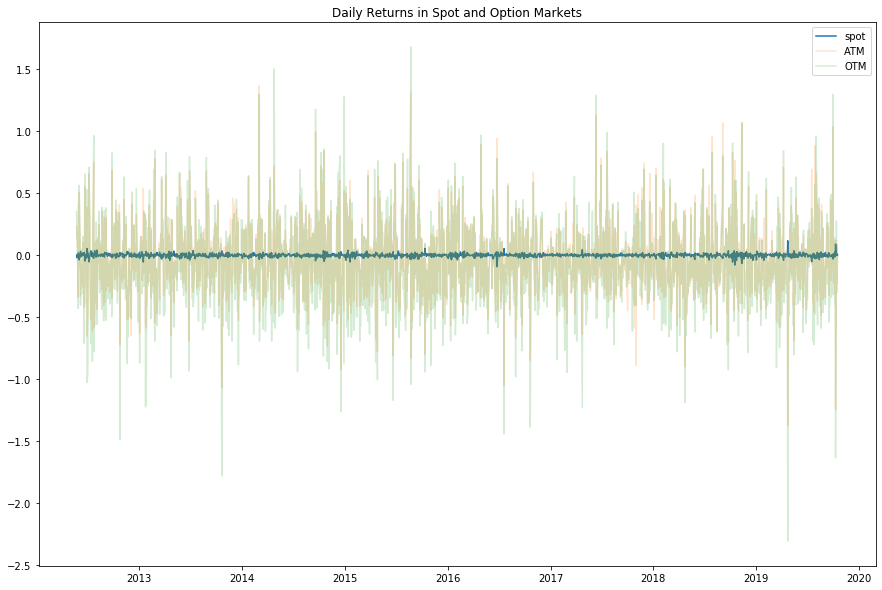

In [98]:
plt.figure(figsize=(15,10))
plt.plot(r_t_.index, r_t_, label='spot')
plt.plot(r_t_.index, sap_atm_options_['log_return'], alpha=0.2, label='ATM')
plt.plot(r_t_.index, sap_otm_options_['log_return'], alpha=0.2, label='OTM')
plt.title('Daily Returns in Spot and Option Markets')
plt.legend()

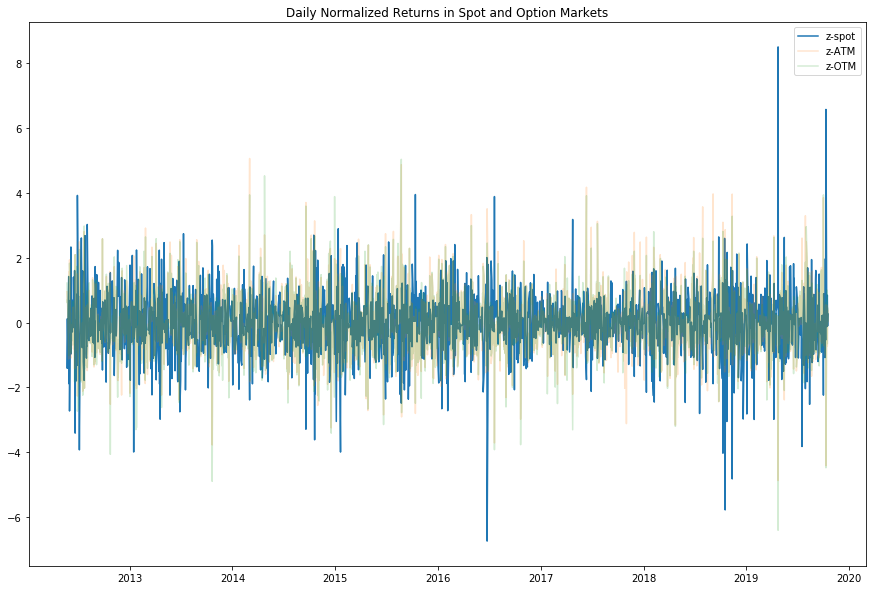

In [100]:
plt.figure(figsize=(15,10))
plt.plot(r_t_.index, zscore(r_t_), label='z-spot')
plt.plot(r_t_.index, zscore(sap_atm_options_['log_return']), alpha=0.2, label='z-ATM')
plt.plot(r_t_.index, zscore(sap_otm_options_['log_return']), alpha=0.2, label='z-OTM')
plt.title('Daily Normalized Returns in Spot and Option Markets')
plt.legend()

In [101]:
np.corrcoef(sap_atm_options_['log_return'], sap_otm_options_['log_return'])

array([[1.        , 0.95207465],
       [0.95207465, 1.        ]])

In [102]:
np.corrcoef(sap_atm_options_['log_return'], r_t_)

array([[ 1.        , -0.74484382],
       [-0.74484382,  1.        ]])

In [103]:
np.corrcoef(sap_otm_options_['log_return'], r_t_)

array([[ 1.        , -0.69835125],
       [-0.69835125,  1.        ]])

## Option vs Spot Vol

In [104]:
SVM = QLSV(r_t_.values - r_t_.values.mean())
SVM_result = SVM.fit(cov_type='robust')

SVM_condVol_sap = np.exp(SVM_result.smoothed_state[0] / 2)

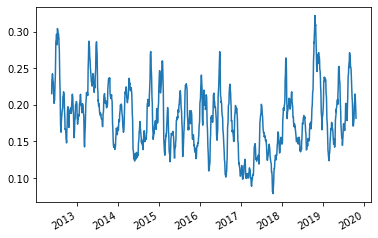

In [105]:
pd.Series(np.sqrt(252)*SVM_condVol_sap,index=r_t_.index).plot();

### in-sample prediction: For simplicity ASSUME SVM vol is unit root. 

In [106]:
svm_prediction = np.sqrt(252) * SVM_condVol_sap #assumption of unit root (i.e. highly persistent vol). NOTE: annualized

In [107]:
q_atm = sap_atm_options_["bs_impl_vol"] 
q_atm.name = 'ATM impl.vol'

In [108]:
q_otm = sap_otm_options_["bs_impl_vol"]
q_otm.name = 'OTM impl.vol'

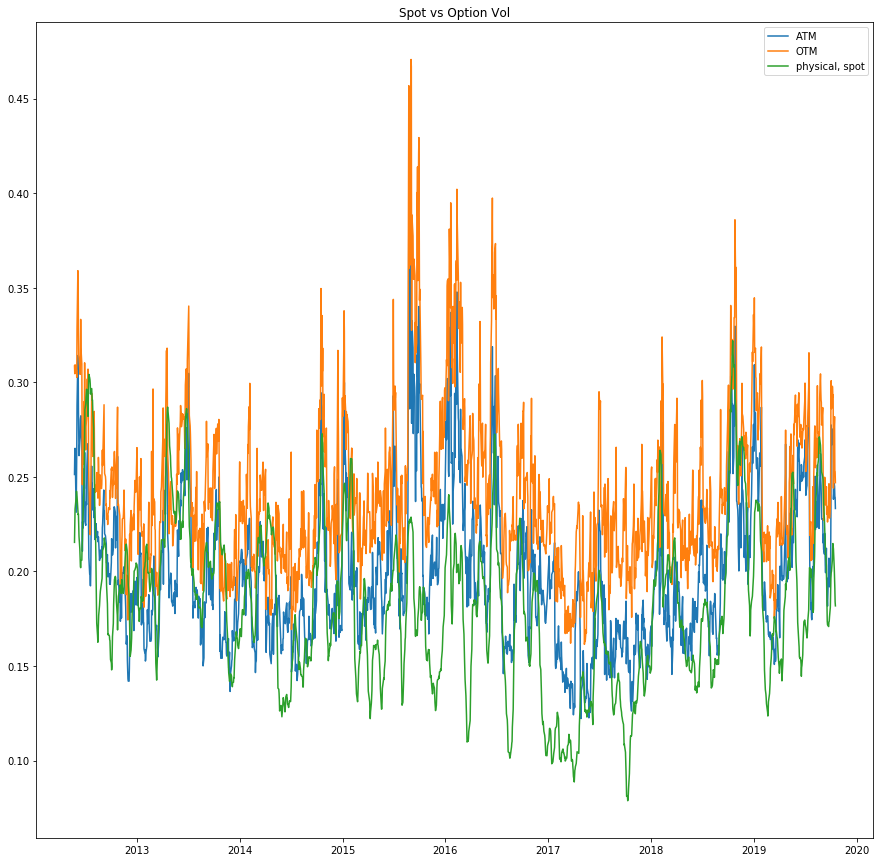

In [110]:
plt.figure(figsize=(15,15))

plt.plot(q_atm.index, q_atm, label='ATM')
plt.plot(q_atm.index, q_otm, label='OTM')
plt.plot(q_atm.index, svm_prediction, label='physical, spot')
plt.title('Spot vs Option Vol')
plt.legend()

 

## Variance Risk Premium

Variance risk premium is defined as

$$
VRP_{t,T} = Var^P(\sigma^2_{t\rightarrow T}) - Var^Q(\sigma^2_{t \rightarrow T}).
$$

In words: Expected future variance in the spot market minus the priced-in variance in the option market.
    
 


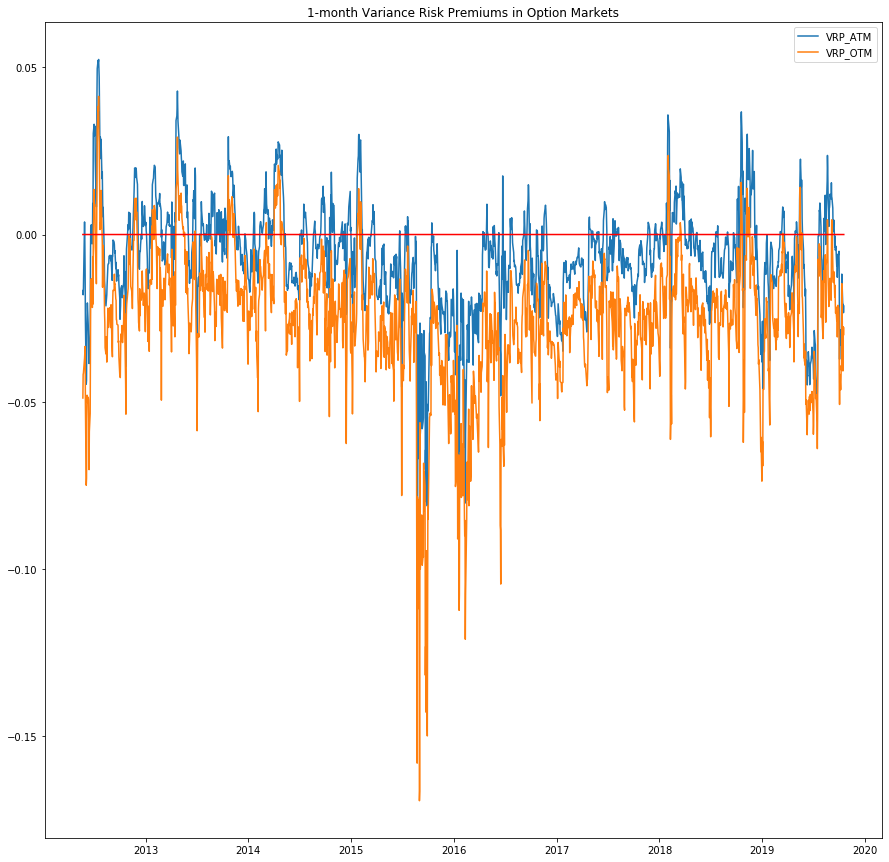

In [111]:
plt.figure(figsize=(15,15))

plt.plot(q_atm.index, svm_prediction**2 - q_atm**2, label='VRP_ATM')
plt.plot(q_atm.index, svm_prediction**2 - q_otm**2, label='VRP_OTM')
plt.plot(q_atm.index, 0*q_otm, 'r')
plt.title('1-month Variance Risk Premiums in Option Markets')
plt.legend()

 

# Some Spreads between Spot and Option Markets 

In [112]:
print( np.mean(q_atm - svm_prediction)*100 )# annualized in %
print( np.std(q_atm - svm_prediction) *100 )#annualized in %

1.710540777278349
3.779529836591529


**Average Spread between Q and P Vol (OTM)**

In [113]:
print( np.mean(q_otm - svm_prediction)*100)
print(np.std(q_otm - svm_prediction) *100 )#annualized in % )

5.993108973182496
4.1312788595830545


**Average Spread between OTM Q and ATM Q Vol**

In [114]:
print( np.mean(q_otm - q_atm)*100)
print(np.std(q_otm - q_atm) *100 )#annualized in % )

4.282568195904153
1.5137789007399982
